<div style="font-family: Arial, sans-serif; line-height: 1.7; color: #222;">

  <h1 style="color:#1f4fd8; text-align:center;">
    Overfitting, Underfitting & Dropout Regularization
  </h1>

  <hr>

  <h2 style="color:#0b6efd;">🧵 Real-Life Intuition: The T-Shirt Example</h2>

  <p>
    When you go out to buy a t-shirt for yourself, you will not buy something
    which is very fit to your body because then if you eat pizza or paratha
    and biryani and if you become fat, it will not be convenient.
  </p>

  <p>
    You will also not buy something that is very loose because then it looks
    like a cloth hanging on a skeleton.
  </p>

  <p>
    You will try to buy a <b>right fit</b> for your body.
  </p>

  <p>
    The problem of <b>overfitting</b> and <b>underfitting</b> happens in the
    machine learning world as well.
  </p>

  <hr>

  <h2 style="color:#0b6efd;">🤖 <b>Overfitting & Underfitting</b> in Machine Learning</h2>

  <p>
    There are techniques to tackle this overfitting and underfitting problem,
    and these techniques are called <b>regularization techniques</b>.
  </p>

  <p>
    When you have training data, you try to train your model too much,
    it might <b>overfit</b>.
  </p>

  <p>
    And when you get the actual test data for doing prediction,
    it will probably not perform well.
  </p>

  <p>
    <b>Dropout regularization</b> is one of the techniques that is used to
    tackle the overfitting problem in the deep learning field.
  </p>

  <p>
    And that's what we are going to look into in this Practical exercise.
    As usual, we'll go over some theory first and then we'll write Python
    code using <b>TensorFlow</b>.
  </p>

  <p>
    We will see how adding a <b>dropout layer</b> increases the performance
    of a neural network.
  </p>

  <hr>

  <h2 style="color:#0b6efd;">📊 Visual Understanding: Overfitting vs Underfitting</h2>

  <p>
    I did a Google image search on <i>overfitting versus underfitting</i>
    and found some useful images.
  </p>

  <p>
    Consider a classification problem where data points belong to two classes
    (for example circles and check marks).
  </p>

  <ul>
    <li>
      <b>Underfitting:</b> The model generalizes too much and draws a simple
      linear line even on the training dataset itself. As a result, performance
      on the test dataset is poor.
    </li>
    <li>
      <b>Overfitting:</b> The model tries to squeeze boundaries tightly around
      the training data to perform best on training samples, but it fails
      to generalize and performs poorly on test data.
    </li>
    <li>
      <b>Right Fit:</b> The middle case represents good generalization,
      which is the ideal behavior of a machine learning model.
    </li>
  </ul>

  <p>
    The goal is to find the <b>right balance</b> between underfitting and
    overfitting — just like choosing the right t-shirt size.
  </p>

  <hr>

  </div>

<div style="text-align:center;">
  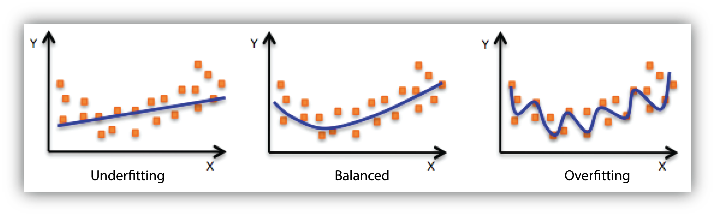
</div>


<div>
<h2 style="color:#0b6efd;">🧠 Dropout in Deep Neural Networks</h2>

  <p>
    Consider a neural network with two hidden layers.
    In real-world applications, neural networks can be much deeper,
    with many hidden layers and a large number of neurons.
  </p>

  <p>
    When such a complex model is trained for many epochs,
    it may overfit the dataset and fail to generalize well.
  </p>

  <p>
    One effective solution is to <b>randomly drop neurons</b> during training.
  </p>

  <p>
    For example:
  </p>

  <ul>
    <li>From the first hidden layer, two neurons are dropped.</li>
    <li>From the second hidden layer, two neurons are also dropped.</li>
    <li>The selection of neurons is completely random.</li>
  </ul>

  <p>
    If we drop 2 out of 4 neurons, the dropout rate is <b>50%</b> (0.5).
    A dropout rate of 0.2 means 20% of neurons are dropped.
  </p>

  <p>
    For each training sample, a different random set of neurons is dropped.
    The dropout rate remains the same, but the neurons change.
  </p>

  <p>
    Different layers can have different dropout rates.
    This process is largely <b>trial and error</b>.
  </p>

  <hr>

  <h2 style="color:#0b6efd;">🔍 Why Dropout Works</h2>

  <p>
    When neurons are dropped randomly, a neuron cannot rely too heavily
    on specific inputs because those inputs might disappear during training.
  </p>

  <p>
    This prevents neurons from becoming biased toward dominant features
    and avoids learning redundant details.
  </p>

  <p>
    As a result, dropout helps the network generalize better and reduces overfitting.
  </p>

  <hr>
    <div style="display:flex; justify-content:center; gap:20px;">
      <img src="neurons_dropout_1.png" style="width:45%; border-radius:8px;">
      <img src="neurons_dropout_2.png" style="width:45%; border-radius:8px;">
    </div>

  <h2 style="color:#0b6efd;">📁 Dataset Used in This Practical Exercice</h2>

  <p>
    We will now write Python code to build an artificial neural network
    and observe how dropout improves performance.
  </p>

  <p>
    The dataset used is a <b>binary classification dataset</b> related to
    sonar signals.
  </p>

  <p>
    It determines whether sonar signals are bounced off:
  </p>

  <ul>
    <li><b>M</b> — Metal cylinder</li>
    <li><b>R</b> — Roughly cylindrical rock</li>
  </ul>

  <p>
    The CSV file contains many numerical features, and the final column
    represents the class label (R or M).
  </p>

</div>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("./sonar_dataset.csv" , header=None) # header=None because dataset dosn't contain columns names
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
64,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063,R
103,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
151,0.0231,0.0315,0.0170,0.0226,0.0410,0.0116,0.0223,0.0805,0.2365,0.2461,...,0.0125,0.0036,0.0123,0.0043,0.0114,0.0052,0.0091,0.0008,0.0092,M
133,0.0790,0.0707,0.0352,0.1660,0.1330,0.0226,0.0771,0.2678,0.5664,0.6609,...,0.0298,0.0390,0.0294,0.0175,0.0249,0.0141,0.0073,0.0025,0.0101,M
109,0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,...,0.0214,0.0262,0.0177,0.0037,0.0068,0.0121,0.0077,0.0078,0.0066,M


In [4]:
df.shape

(208, 61)

In [5]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [7]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [10]:
X = df.drop(60,axis='columns')
y = df[60]
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [12]:
y = pd.get_dummies(y, drop_first=True).astype(int)
y.sample(5) # R-->1 and M -->0

,R
15,1
13,1
139,0
88,1
0,1


In [13]:
y.value_counts()

R
0    111
1     97
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=1)
#random_state is a seed for randomness.
X_train.shape , X_test.shape

((156, 60), (52, 60))

In [17]:
import tensorflow as tf 
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dense(30,activation='relu') ,
    keras.layers.Dense(15,activation='relu') ,
    keras.layers.Dense(1,input_dim=60,activation='sigmoid') ,
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 6s 11ms/step - loss: 0.6963 - accuracy: 0.5321
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.5385
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6716 - accuracy: 0.5513
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6565 - accuracy: 0.5769
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6380 - accuracy: 0.6538
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6159 - accuracy: 0.7244
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5959 - accuracy: 0.7500
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.7244
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5416 - accuracy: 0.7756
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5056 - accuracy: 0.8397
Epoch 

In [19]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 12ms/step - loss: 1.1543 - accuracy: 0.7692


[1.1543071269989014, 0.7692307829856873]

### keep in mind that the accuracy on test data is **0.76**

In [20]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 9ms/step
[2.1253567e-07 9.4790632e-01 2.7873224e-01 2.2782760e-05 9.9999964e-01
 9.9978107e-01 1.6358021e-01 9.9999976e-01 3.5691359e-05 9.9999988e-01]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]


In [21]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [22]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        27
           1       0.88      0.60      0.71        25

    accuracy                           0.77        52
   macro avg       0.80      0.76      0.76        52
weighted avg       0.80      0.77      0.76        52



In [37]:
import tensorflow as tf 
from tensorflow import keras

model1=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu') ,
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu') ,
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1,input_dim=60,activation='sigmoid') ,
])
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 7ms/step - loss: 0.7838 - accuracy: 0.5385
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.7167 - accuracy: 0.4615
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6898 - accuracy: 0.5833
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.7008 - accuracy: 0.5256
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6934 - accuracy: 0.5641
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6947 - accuracy: 0.5321
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6891 - accuracy: 0.5385
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6761 - accuracy: 0.5449
Epoch 9/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5128
Epoch 10/100
20/20 [==============================] - 0s 12ms/step - loss: 0.6692 - accuracy: 0.5705
Ep

##### Now we got the accuracy more low than the previous one

In [38]:
model1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3929 - accuracy: 0.8077


[0.39292386174201965, 0.807692289352417]

### Now we get better acuracy in the test data **0.80**, this is thanks to do dropout

In [39]:
y_pred1 = model1.predict(X_test).reshape(-1)
print(y_pred1[:10])

# round the values to nearest integer ie 0 or 1
y_pred1 = np.round(y_pred1)
print(y_pred1[:10])

2/2 [==============================] - 0s 7ms/step
[1.8935119e-06 2.2087395e-01 8.8383615e-01 1.8016376e-03 9.9926120e-01
 9.5514059e-01 1.2796004e-01 9.9951911e-01 9.1470173e-04 9.9959141e-01]
[0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]


In [40]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [41]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84        27
           1       0.94      0.64      0.76        25

    accuracy                           0.81        52
   macro avg       0.84      0.80      0.80        52
weighted avg       0.84      0.81      0.80        52



### you can see the improvement of the f1 score values compare to the previous values